<img src='../__docs/__all/notebook_rules.png' />

**Workflow of this notebook**

* **User**: select the images to work with.
* *Notebook*: load images
* **User**: select region to work with by cropping the raw data
* **User**: select horizontal range of profile to combine
* *Notebook*: use that range and combine the data using a mean
* *Notebook*: display the profiles to work with, one profile per image loaded
* **User**: select the position (edges) of the inner and outer cylinders
* *Notebook*: clean the edges by removing data outside of the outer cylinder
* *Notebook*: switch from transmission to attenuation mode
* *Notebook*: calculate the number of counts per pixel in the outer cylinder
* *Notebook*: apply geometry correction to all profiles
* **User**: now working on the inner cylinder, check or redefine the edges of the inner cylinder
* *Notebook*: apply geometry correction to inner cylinder
* **User**: select where to output the ascii files that will contains the profiles.

# Python Import 

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

%matplotlib notebook

# from __code import system
# system.System.select_working_dir()

from ipts_27939_code.ipts_27939 import IPTS_27939


# Select Images 

In [2]:
# working_dir="/Volumes/G-DRIVE/IPTS/IPTS-27939-registration-geometry-correction/"
working_dir="/Users/j35/HFIR/CG1D/IPTS-27939-cylindrical_correction/"
o_ipts = IPTS_27939(working_dir=working_dir)
import glob
list_images = glob.glob(working_dir + "2022_10_07_FLiBe2_normalized/20221007_01_heating_to_500_0030_000*.tiff")
o_ipts.load_images(list_images)

In [3]:
# o_ipts = IPTS_27939(working_dir=system.System.get_working_dir())
# o_ipts.select_images()

# Visualize Raw Data

The data are rotated 90 degrees to work with the cylindrical geometry algorithm

<IPython.core.display.Javascript object>


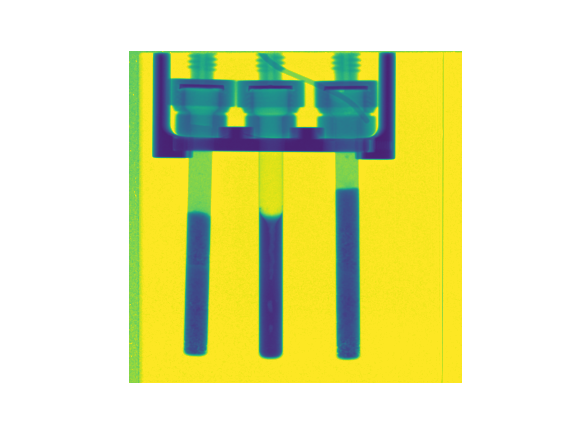

interactive(children=(IntSlider(value=0, description='image_index', layout=Layout(width='50%'), max=2), Output…

In [4]:
o_ipts.visualize_raw_images()

# Rotate sample to make sure it's perfectly vertical

Use the **vertical guide** to help you find the perfect vertical to your sample.

<img src='ipts_27939_code/static/example_of_bad_and_good_alignments.png' />

<IPython.core.display.Javascript object>


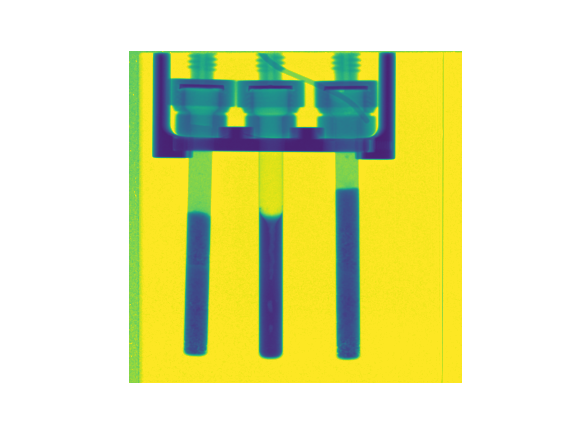

interactive(children=(FloatSlider(value=0.0, description='rot_value', layout=Layout(width='50%'), max=5.0, min…

In [5]:
o_ipts.rotate_images()

# crop sample to region of interest 

By playing with the **left**, **right**, **top** and **bottom** sliders, select a region surrounding the data you
want to work with.
<html>
    <br>
    <font color="red">Warning:</color>
    </html>

* Make sure you include the external cylinder (container) in the selection 
and 
* a part of the container without sample inside (will be used for normalization)

For example:

<img src='ipts_27939_code/static/example_crop_region.png' />

<IPython.core.display.Javascript object>


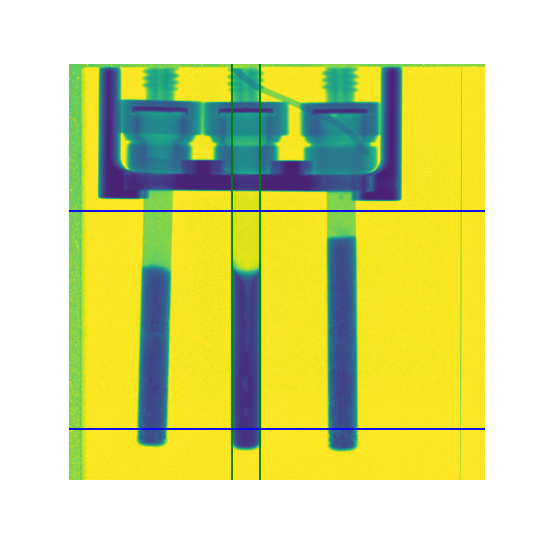

interactive(children=(IntSlider(value=0, description='image_index', max=2), IntSlider(value=801, description='…

In [6]:
o_ipts.apply_rotation()
o_ipts.select_crop_region()

## Visualize result of cropping 

<IPython.core.display.Javascript object>


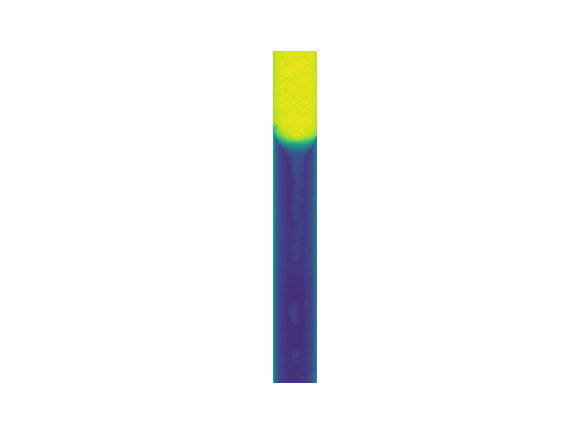

interactive(children=(IntSlider(value=0, description='image_index', max=2), Output()), _dom_classes=('widget-i…

In [7]:
o_ipts.visualize_crop()

# Select background

Select a part of the tube that does not contain the sample. The horizontal profile of this region, integrated over the y-axis, will be used as the background signal to remove from the data.

__for example:__

<img src='ipts_27939_code/static/example_background_selection.png' />

<IPython.core.display.Javascript object>


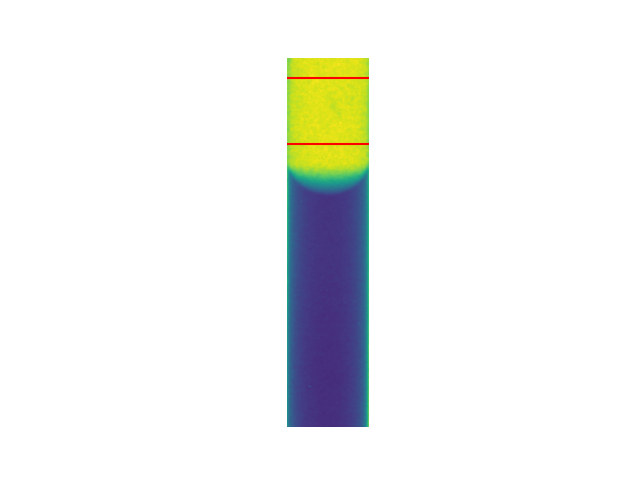

interactive(children=(IntSlider(value=0, description='image_index', max=7), IntSlider(value=50, description='t…

In [9]:
o_ipts.background_range_selection()

# Select sample

Select the **top** and **bottom** limit of your sample. 

__For example:__

<img src='ipts_27939_code/static/example_of_sample_selection.png' />


<IPython.core.display.Javascript object>


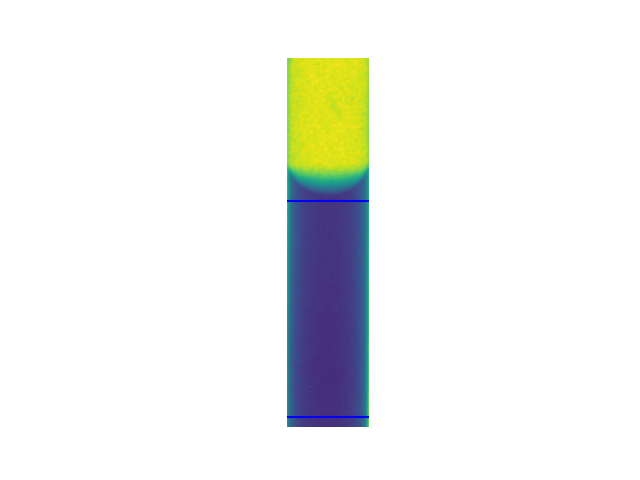

interactive(children=(IntSlider(value=0, description='image_index', max=7), IntSlider(value=89, description='t…

In [10]:
o_ipts.selection_of_profiles_limit()

# Profiles to work with 

<IPython.core.display.Javascript object>


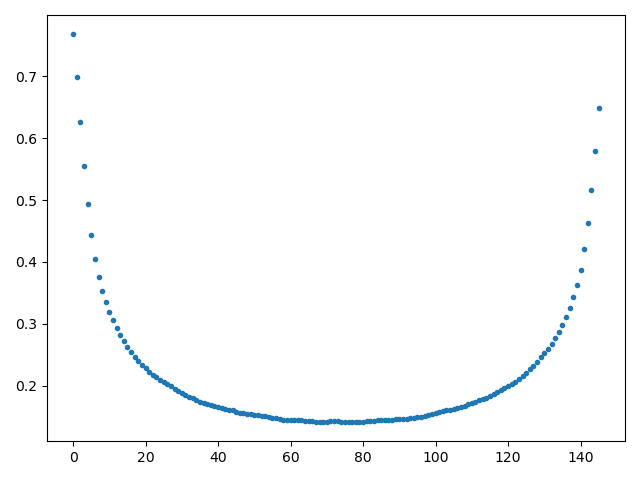

interactive(children=(IntSlider(value=0, description='image_index', max=7), Output()), _dom_classes=('widget-i…

In [11]:
o_ipts.display_of_profiles()

# Let's define the position of the cylinders edges 

<IPython.core.display.Javascript object>


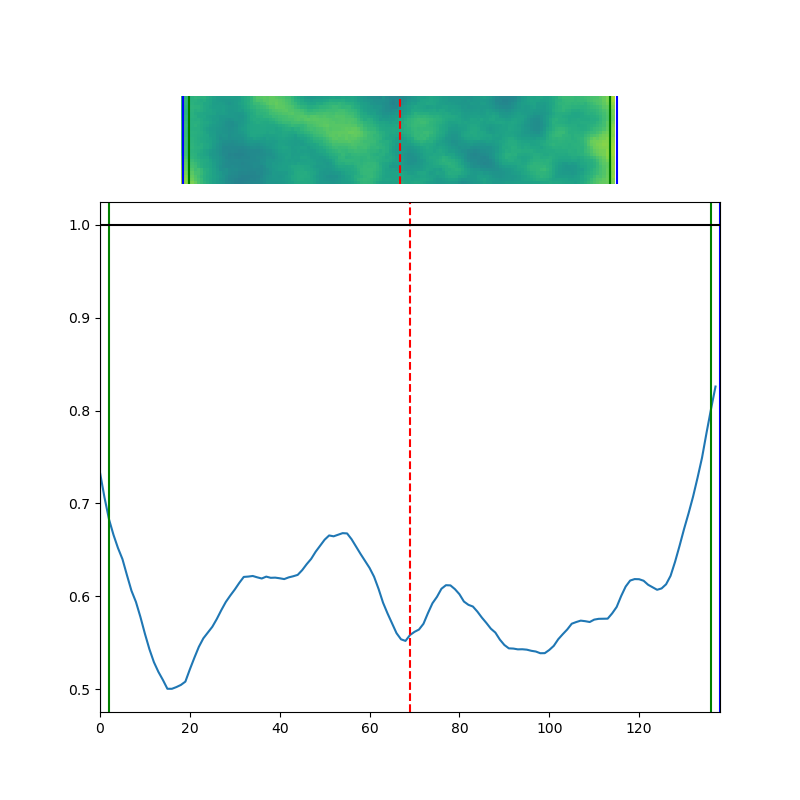

interactive(children=(IntSlider(value=0, description='image_index', max=1), IntSlider(value=138, description='…

In [15]:
o_ipts.cylinders_positions()

# Cleaning edges

Data outside of the cylinders must be removed. To do so, the algorithm will use the **outer_radius** value you defined in the previous cell and will only keep the data within that region.

<IPython.core.display.Javascript object>


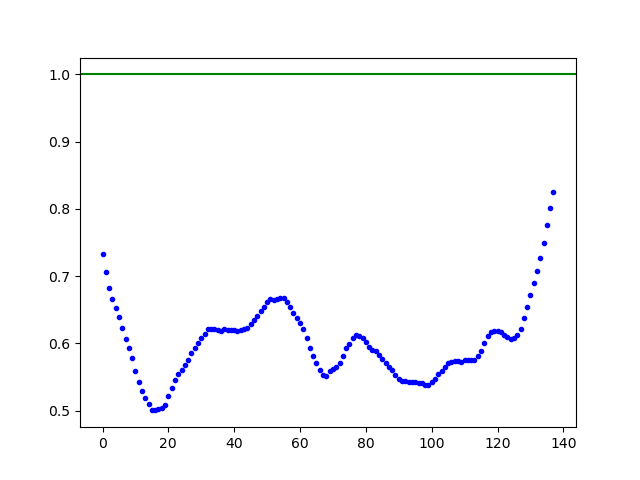

interactive(children=(IntSlider(value=0, description='image_index', max=1), Output()), _dom_classes=('widget-i…

In [16]:
o_ipts.cleaning_edges()

# Switching to attenuation mode  

<IPython.core.display.Javascript object>


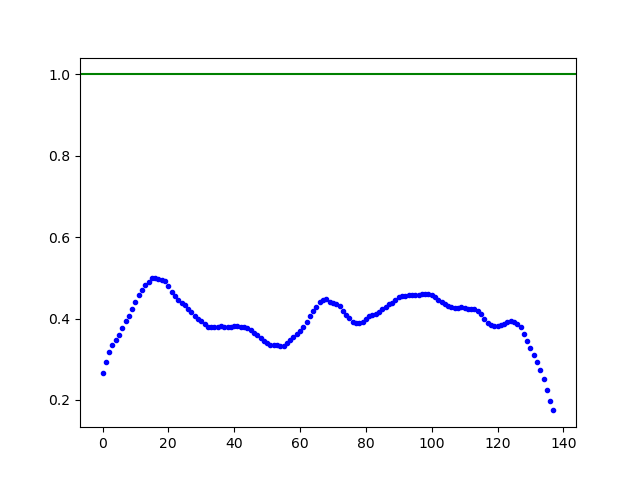

interactive(children=(IntSlider(value=0, description='image_index', max=1), Output()), _dom_classes=('widget-i…

In [17]:
o_ipts.switching_to_attenuation_mode()

# Calculate number of counts per pixel in outer cylinder.

<IPython.core.display.Javascript object>


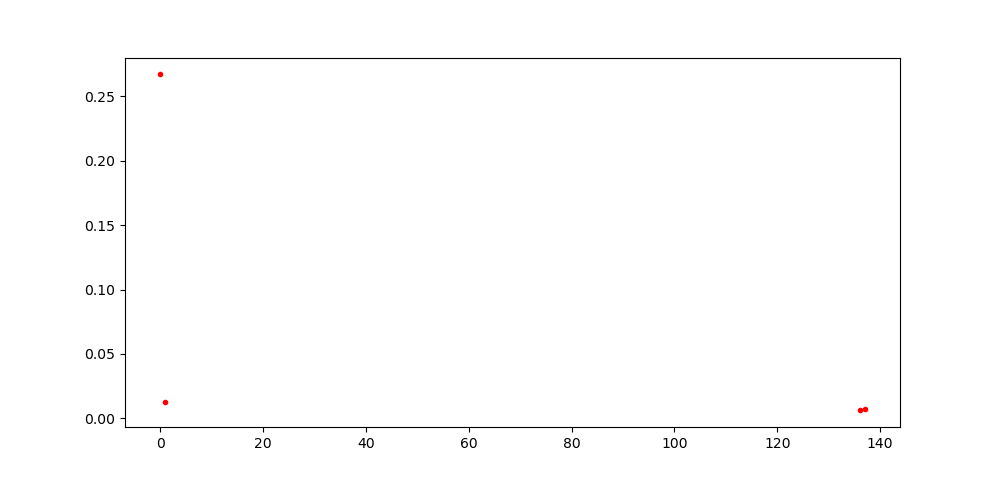

interactive(children=(IntSlider(value=0, description='image_index', max=1), Output()), _dom_classes=('widget-i…

In [18]:
o_ipts.outer_cylinder_geometry_correction()

# Applying outer cylinder correction to all profiles

In [ ]:
o_ipts.full_profile_with_only_outer_cylinder_corrected()

# Working on inner cylinder 

We find the center, radius and truncate outside cylinder, keeping only the data from the inner cylinder

**Instructions**
In the following plot, make sure the edges you predefined before are still matching the edge of the inner cylinder profile.

In [ ]:
o_ipts.crop_to_inner_cylinder()

In [ ]:
o_ipts.correct_inner_cylinder_geometry()

# Export profile(s) corrected into text file(s)

Select the folder where you want to create the text files, comma separated file, of the inner cylinder profiles corrected. Each image will have its own text file.

In [ ]:
o_ipts.export_profiles()